In [191]:
print('Hello, World!')

Hello, World!


### Libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import json
from collections import Counter
import category_encoders as ce
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [193]:
path = '/home/huzaifa/Downloads/T_UAE training/ML2/COVID_19_mRNA_VD/Data/'
 
try:
    Data = pd.read_json(str(path+'train.json'),
                        lines=True,
                        orient='columns')
    test = pd.read_csv(path+'test.csv')
    sub = pd.read_csv(path+'sample_submission.csv')
    print('Read Data from {} is Done \U0001f600'.format('train.json, test.csv and sample_submission.csv'))
    print('The shape of Train: ', Data.shape)
    print('The shape of Test: ', test.shape)
    print('The shape of subSample: ', sub.shape)
except Exception:
    print('Can\'t read Data ..! \U0001F923')

Read Data from train.json, test.csv and sample_submission.csv is Done 😀
The shape of Train:  (2400, 19)
The shape of Test:  (2493, 16)
The shape of subSample:  (254286, 4)


In [194]:
Data.drop('index', axis=1, inplace=True)
print('Train Data: ')
display(Data.head())
print('Test Data: ')
display(test.head())

Train Data: 


,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


Test Data: 


,id,ID,sequence,structure,seqpos,errors,deg_pH10_Mg_errors,deg_50C_Mg_errors,S/N filter,predicted_loop_type,seq_scored,seq_length,cluster_id,n_neighbors,first_cluster_member,test_filter
0,id_40f52a81b,10207086,GGAAAUUUUCGCGGGACGGGCGGCCGGGCGGAGGCGGCGCGAGGGC...,.......(((((.((.((..(.(((..(((...((..((((....(...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4419, 0.4736, 0.4529, 0.30820000000000003, ...","[0.4333, 0.491, 0.4375, 0.3079, 0.5534, 0.3432...","[0.5922000000000001, 0.5873, 0.434700000000000...",1,EEEEEEESSSSSISSISSIISISSSIISSSIIISSIISSSSIIIIS...,92,130,694,2,1,1
1,id_59252b684,10207088,GGAAAUUUUCGCGGGACGGGCGGCAGGGCUGAGGUUUCGCGAGGGC...,........(((((((((...((((...))))..))))))))).......,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.3924, 0.3191, 0.3269, 0.2175, 0.3406, 0.259...","[0.4247, 0.3841, 0.34440000000000004, 0.2682, ...","[0.48960000000000004, 0.4184, 0.432, 0.3526, 0...",1,EEEEEEEESSSSSSSSSIIISSSSHHHSSSSIISSSSSSSSSMMMM...,92,130,694,2,0,1
2,id_ebf1148ee,10207093,GGAAAUUUUCGCGAGACAAGCGGCAGGGCUGAGAUUACGCGAGGGC...,........(((((.....(((......))).......)))))..((...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.2933, 0.33140000000000003, 0.2746, 0.237500...","[0.26990000000000003, 0.3124, 0.2505, 0.2142, ...","[0.3024, 0.3673, 0.3183, 0.2696, 0.4048, 0.294...",1,EEEEEEEESSSSSIIIIISSSHHHHHHSSSIIIIIIISSSSSXXSS...,92,130,696,6,1,1
3,id_63c3b7d50,10207098,GGAAAUUUUCGCGAGACCAGCGGCAGGGCUGAGCUAACGCGAGGGC...,........(((((((..((((......))))..))..)))))((.(...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.1713, 0.1758, 0.1399, 0.11220000000000001, ...","[0.15080000000000002, 0.1819, 0.14780000000000...","[0.177, 0.202, 0.1847, 0.1555, 0.2392000000000...",1,EEEEEEEESSSSSSSIISSSSHHHHHHSSSSIISSBBSSSSSSSIS...,92,130,696,6,0,0
4,id_a181978cc,10207103,GGAAAUUUUCGCGAGACCAGCGGCAGGGCUGAGCUAACGCGAGGGC...,........(((((((..((((......))))..))..))))).......,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.1192, 0.1288, 0.1018, 0.09290000000000001, ...","[0.1279, 0.14350000000000002, 0.1061, 0.0945, ...","[0.136, 0.1564, 0.1408, 0.11810000000000001, 0...",1,EEEEEEEESSSSSSSIISSSSHHHHHHSSSSIISSBBSSSSSXXXX...,92,130,696,6,0,0


In [195]:
Data.columns

Index(['id', 'sequence', 'structure', 'predicted_loop_type', 'signal_to_noise',
       'SN_filter', 'seq_length', 'seq_scored', 'reactivity_error',
       'deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C',
       'deg_error_50C', 'reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C',
       'deg_50C'],
      dtype='object')

In [196]:
test.columns

Index(['id', 'ID', 'sequence', 'structure', 'seqpos', 'errors',
       'deg_pH10_Mg_errors', 'deg_50C_Mg_errors', 'S/N filter',
       'predicted_loop_type', 'seq_scored', 'seq_length', 'cluster_id',
       'n_neighbors', 'first_cluster_member', 'test_filter'],
      dtype='object')

In [197]:
print('columns in train not in test: ')
set(Data.columns.tolist()) - set(test.columns.tolist())

columns in train not in test: 


{'SN_filter',
 'deg_50C',
 'deg_Mg_50C',
 'deg_Mg_pH10',
 'deg_error_50C',
 'deg_error_Mg_50C',
 'deg_error_Mg_pH10',
 'deg_error_pH10',
 'deg_pH10',
 'reactivity',
 'reactivity_error',
 'signal_to_noise'}

In [198]:
print('columns in test not in train: ')
set(test.columns.tolist()) - set(Data.columns.tolist())

columns in test not in train: 


{'ID',
 'S/N filter',
 'cluster_id',
 'deg_50C_Mg_errors',
 'deg_pH10_Mg_errors',
 'errors',
 'first_cluster_member',
 'n_neighbors',
 'seqpos',
 'test_filter'}

In [199]:
print('columns in test and train: ')
set(test.columns.tolist()).intersection(set(Data.columns.tolist()))

columns in test and train: 


{'id',
 'predicted_loop_type',
 'seq_length',
 'seq_scored',
 'sequence',
 'structure'}

In [200]:
sub.columns

Index(['id_seqpos', 'reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], dtype='object')

### Feature Extraction

In [201]:
# sum value of bpps
def read_bpps_sum(df, path):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps_arr.append(np.load(path+str(mol_id)+'.npy').max(axis=1))
    return bpps_arr

# max value of bpps
def read_bpps_max(df, path):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps_arr.append(np.load(path+str(mol_id)+'.npy').sum(axis=1))
    return bpps_arr

# non zero number of bpps
def read_bpps_nb(df, path, thre=0):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps = np.load(path+str(mol_id)+'.npy')
        bpps_arr.append((bpps > thre).sum(axis=0) / bpps.shape[0])
    return bpps_arr

In [202]:
path = '/home/huzaifa/Downloads/T_UAE training/ML2/COVID_19_mRNA_VD/Data/bpps/bpps/'

Data['bpps_sum'] = read_bpps_sum(Data, path)
test['bpps_sum'] = read_bpps_sum(test, path)

Data['bpps_max'] = read_bpps_max(Data, path)
test['bpps_max'] = read_bpps_max(test, path)

Data['bpps_nb'] = read_bpps_nb(Data, path)
test['bpps_nb'] = read_bpps_nb(test, path)

In [203]:
len(Data.bpps_sum.iloc[0])
# len(Data.reactivity.iloc[0])

107

### Analyze Data

In [204]:
# file = np.load(path+'bpps/bpps/id_0a2bbe37e.npy')

In [205]:
test['sequence'].apply(lambda x: len(x)).value_counts()

130    2493
Name: sequence, dtype: int64

In [206]:
test['structure'].apply(lambda x: len(x)).value_counts()

130    2493
Name: structure, dtype: int64

In [207]:
test.seq_scored.value_counts()

92    2493
Name: seq_scored, dtype: int64

In [208]:
len(eval(test['deg_50C_Mg_errors'].iloc[0]))

102

In [209]:
Data['reactivity_mean'] = Data['reactivity'].apply(lambda x: sum(x)/len(x))
Data['mg_ph10_mean'] = Data['deg_Mg_pH10'].apply(lambda x: sum(x)/len(x))
Data['mg_50C_mean'] = Data['deg_Mg_50C'].apply(lambda x: sum(x)/len(x))
Data['reactivity_error_mean'] = Data['reactivity_error'].apply(lambda x: sum(x)/len(x))
Data['mg_ph10_error_mean'] = Data['deg_error_Mg_pH10'].apply(lambda x: sum(x)/len(x))
Data['mg_50C_error_mean'] = Data['deg_error_Mg_50C'].apply(lambda x: sum(x)/len(x))

In [210]:
Data.head()

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,...,deg_50C,bpps_sum,bpps_max,bpps_nb,reactivity_mean,mg_ph10_mean,mg_50C_mean,reactivity_error_mean,mg_ph10_error_mean,mg_50C_error_mean
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...",...,"[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000...","[0.0217857, 0.0386527, 0.0275904, 0.00947066, ...","[0.19854229, 0.18371220000000002, 0.0600024000...","[0.2616822429906542, 0.18691588785046728, 0.04...",0.502631,0.559628,0.538540,0.073782,0.093646,0.083009
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...",...,"[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.11931483477784201, 0.0808186531761711, 0.06...","[0.16883627604054915, 0.10675940059456464, 0.0...","[0.12149532710280374, 0.12149532710280374, 0.0...",0.411401,0.698354,0.930103,2.183381,31435.408704,5.155074
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...",...,"[0.9501000000000001, 1.7974999999999999, 1.499...","[0.017340043515196805, 0.00826566577930985, 0....","[0.06680724164624499, 0.04433748694733778, 0.0...","[0.2803738317757009, 0.308411214953271, 0.1495...",0.433966,0.578362,0.570284,0.049585,0.074437,0.056375
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...",...,"[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0350158, 0.0332295, 0.00272567, 0.0, 0.0, 0...","[0.22702912000000003, 0.18439387000000002, 0.0...","[0.1308411214953271, 0.1588785046728972, 0.018...",0.329059,0.826485,1.221297,2.984329,37939.115075,76699.016556
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...",...,"[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,...","[0.02230060114516417, 0.052274223411953764, 0....","[0.04036075455181073, 0.08021642791992274, 0.0...","[0.1308411214953271, 0.14953271028037382, 0.09...",0.282204,0.469587,0.393072,0.661482,0.998696,0.898606


Text(0.5, 1.0, 'reactivity_mean')

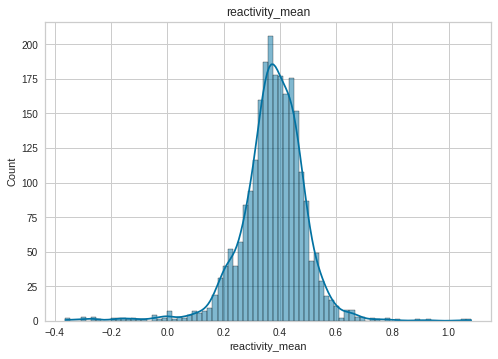

In [211]:
# fig, ax = plt.subplots(2)
sns.histplot(x=Data.reactivity_mean, kde=True)
plt.title('reactivity_mean')

Text(0.5, 1.0, 'mg_ph10_mean')

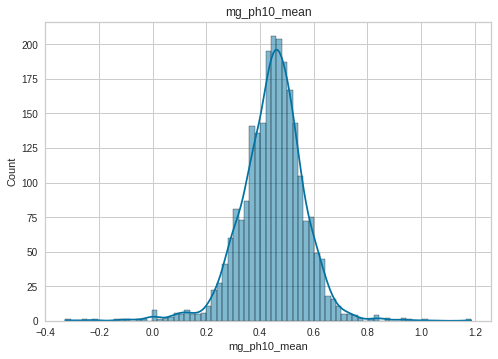

In [212]:
sns.histplot(x=Data.mg_ph10_mean, kde=True)
plt.title('mg_ph10_mean')

Text(0.5, 1.0, 'mg_50C_mean')

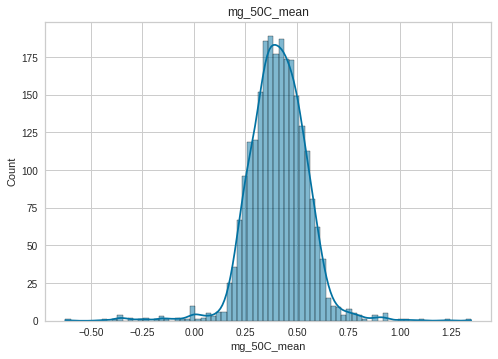

In [213]:
sns.histplot(x=Data.mg_50C_mean, kde=True)
plt.title('mg_50C_mean')

Text(0.5, 1.0, 'Error Correlation')

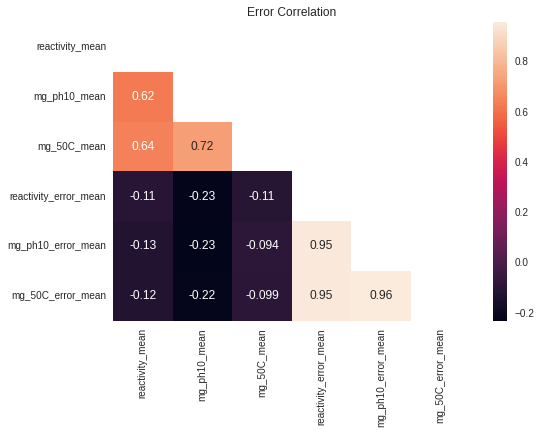

In [214]:
err_corr = Data[['reactivity_mean', 'mg_ph10_mean', 'mg_50C_mean', 'reactivity_error_mean', 'mg_ph10_error_mean', 'mg_50C_error_mean']].corr()
matrix = np.triu(err_corr)
sns.heatmap(err_corr, annot=True, mask=matrix)
plt.title('Error Correlation')

In [215]:
Data['seq_counts'] = Data['sequence'].apply(lambda x: Counter(x.upper()))
Data['seq_counts']

0       {'G': 19, 'A': 45, 'C': 23, 'U': 20}
1       {'G': 33, 'A': 25, 'C': 32, 'U': 17}
2       {'G': 24, 'A': 43, 'U': 20, 'C': 20}
3        {'G': 35, 'A': 28, 'C': 35, 'U': 9}
4         {'G': 6, 'A': 58, 'U': 37, 'C': 6}
                        ...                 
2395    {'G': 22, 'A': 47, 'U': 20, 'C': 18}
2396      {'G': 6, 'A': 72, 'C': 21, 'U': 8}
2397    {'G': 27, 'A': 32, 'C': 29, 'U': 19}
2398    {'G': 25, 'A': 48, 'C': 17, 'U': 17}
2399    {'G': 30, 'A': 34, 'C': 29, 'U': 14}
Name: seq_counts, Length: 2400, dtype: object

In [216]:
percentage = []
for i in range(len(Data)):
    count = Data.iloc[i]['seq_counts']
    percentage.append((count['A']/Data.iloc[i]['seq_length'],
                     count['G']/Data.iloc[i]['seq_length'],
                     count['C']/Data.iloc[i]['seq_length'],
                     count['U']/Data.iloc[i]['seq_length']))

percentage = pd.DataFrame(percentage, columns=['A_p', 'G_p', 'C_p', 'U_p'])
percentage = pd.concat([percentage, Data[['reactivity_mean', 'mg_ph10_mean', 'mg_50C_mean']]], axis=1)
percentage

,A_p,G_p,C_p,U_p,reactivity_mean,mg_ph10_mean,mg_50C_mean
0,0.420561,0.177570,0.214953,0.186916,0.502631,0.559628,0.538540
1,0.233645,0.308411,0.299065,0.158879,0.411401,0.698354,0.930103
2,0.401869,0.224299,0.186916,0.186916,0.433966,0.578362,0.570284
3,0.261682,0.327103,0.327103,0.084112,0.329059,0.826485,1.221297
4,0.542056,0.056075,0.056075,0.345794,0.282204,0.469587,0.393072
...,...,...,...,...,...,...,...
2395,0.439252,0.205607,0.168224,0.186916,0.459390,0.511384,0.539138
2396,0.672897,0.056075,0.196262,0.074766,0.403482,0.315901,0.492297
2397,0.299065,0.252336,0.271028,0.177570,0.223107,0.354449,0.235294
2398,0.448598,0.233645,0.158879,0.158879,0.358229,0.366354,0.261793


Text(0.5, 1.0, 'Probability Correlation')

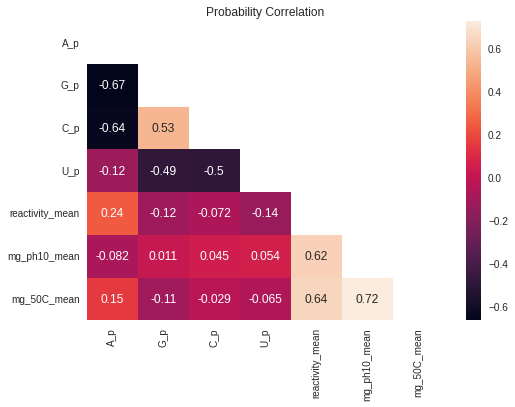

In [217]:
per_corr = percentage.corr()
matrix = np.triu(per_corr)
sns.heatmap(per_corr, annot=True, mask=matrix)
plt.title('Probability Correlation')

Text(0.5, 0, 'U_p')

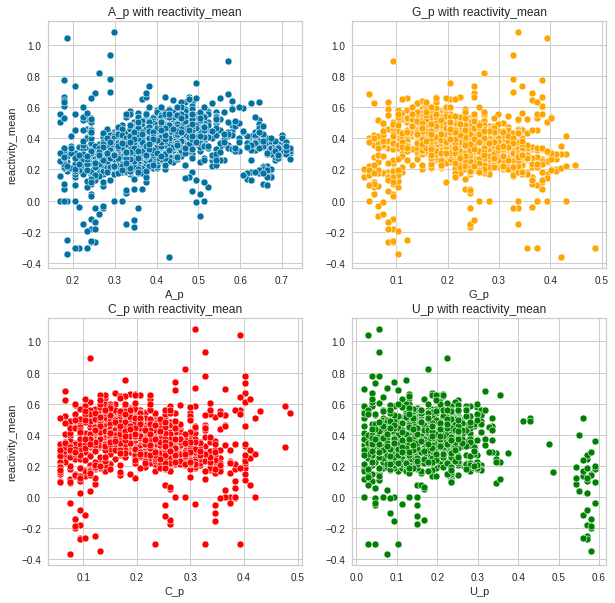

In [218]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(x=percentage['A_p'].values, y=percentage['reactivity_mean'].values, ax=ax[0,0])
ax[0,0].set_title('A_p with reactivity_mean')
ax[0,0].set_xlabel('A_p')
ax[0,0].set_ylabel('reactivity_mean')
sns.scatterplot(x=percentage['G_p'].values, y=percentage['reactivity_mean'].values, color="orange", ax=ax[0,1])
ax[0,1].set_title('G_p with reactivity_mean')
ax[0,1].set_xlabel('G_p')

sns.scatterplot(x=percentage['C_p'].values, y=percentage['reactivity_mean'].values, color= 'red',ax=ax[1,0])
ax[1,0].set_title('C_p with reactivity_mean')
ax[1,0].set_xlabel('C_p')
ax[1,0].set_ylabel('reactivity_mean')
sns.scatterplot(x=percentage['U_p'].values, y=percentage['reactivity_mean'].values, color="green", ax=ax[1,1])
ax[1,1].set_title('U_p with reactivity_mean')
ax[1,1].set_xlabel('U_p')

In [219]:
# pairs = []
# all_partners = []
# for j in range(len(Data)):
#     partners = [-1 for i in range(130)]
#     pairs_dict = {}
#     queue = []
#     for i in range(0, len(Data.iloc[j]['structure'])):
#         if Data.iloc[j]['structure'][i] == '(':
#             queue.append(i)
#         if Data.iloc[j]['structure'][i] == ')':
#             first = queue.pop()
#             try:
#                 pairs_dict[(Data.iloc[j]['sequence'][first], Data.iloc[j]['sequence'][i])] += 1
#             except:
#                 pairs_dict[(Data.iloc[j]['sequence'][first], Data.iloc[j]['sequence'][i])] = 1
                
#             partners[first] = i
#             partners[i] = first
    
#     all_partners.append(partners)
    
#     pairs_num = 0
#     pairs_unique = [('U', 'G'), ('C', 'G'), ('U', 'A'), ('G', 'C'), ('A', 'U'), ('G', 'U')]
#     for item in pairs_dict:
#         pairs_num += pairs_dict[item]
#     add_tuple = list()
#     for item in pairs_unique:
#         try:
#             add_tuple.append(pairs_dict[item]/pairs_num)
#         except:
#             add_tuple.append(0)
#     pairs.append(add_tuple)
    
# pairs = pd.DataFrame(pairs, columns=['U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U'])
# pairs

In [220]:
# pairs = pd.concat([pairs, Data[['reactivity_mean', 'mg_ph10_mean', 'mg_50C_mean']]], axis=1)
# par_corr = pairs.corr()
# matrix = np.triu(par_corr)
# fig, ax = plt.subplots(figsize=(7,7))
# sns.heatmap(par_corr, annot=True, mask=matrix)
# plt.title('Paired Correlation')

In [221]:
pairs_rate = []
for j in range(len(Data)):
    res = dict(Counter(Data.iloc[j]['structure']))
    pairs_rate.append((2*res['(']) / 107)
    
pairs_rate = pd.DataFrame(pairs_rate, columns=['pairs_rate'])
pairs_rate = pd.concat([pairs_rate, Data[['reactivity_mean', 'mg_ph10_mean', 'mg_50C_mean']]], axis=1)

In [222]:
p_rate_corr = pairs_rate.corr()
p_rate_corr['pairs_rate']

pairs_rate         1.000000
reactivity_mean   -0.059824
mg_ph10_mean       0.130447
mg_50C_mean       -0.125589
Name: pairs_rate, dtype: float64

Text(0, 0.5, 'reactivity_mean')

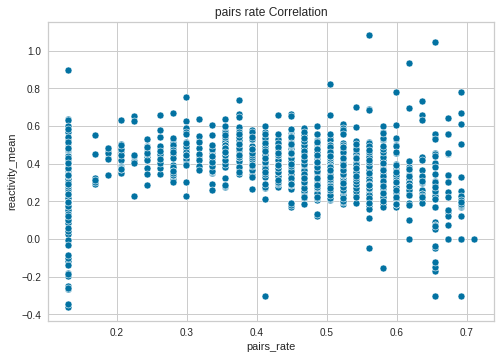

In [223]:
sns.scatterplot(x=pairs_rate['pairs_rate'], y=pairs_rate['reactivity_mean'])
plt.title('pairs rate Correlation')
plt.xlabel('pairs_rate')
plt.ylabel('reactivity_mean')

In [224]:
loops = []
for j in range(len(Data)):
    counts = dict(Counter(Data.iloc[j]['predicted_loop_type']))
    available = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
    row = []
    for item in available:
        try:
            row.append(counts[item] / 107)
        except:
            row.append(0)
    loops.append(row)
    
loops = pd.DataFrame(loops, columns=available)
loops = pd.concat([loops, Data[['reactivity_mean', 'mg_ph10_mean', 'mg_50C_mean']]], axis=1)
loops

,E,S,H,B,X,I,M,reactivity_mean,mg_ph10_mean,mg_50C_mean
0,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000,0.502631,0.559628,0.538540
1,0.242991,0.616822,0.102804,0.009346,0.000000,0.000000,0.028037,0.411401,0.698354,0.930103
2,0.242991,0.448598,0.140187,0.000000,0.009346,0.112150,0.046729,0.433966,0.578362,0.570284
3,0.252336,0.598131,0.130841,0.018692,0.000000,0.000000,0.000000,0.329059,0.826485,1.221297
4,0.242991,0.654206,0.074766,0.028037,0.000000,0.000000,0.000000,0.282204,0.469587,0.393072
...,...,...,...,...,...,...,...,...,...,...
2395,0.271028,0.355140,0.214953,0.000000,0.112150,0.046729,0.000000,0.459390,0.511384,0.539138
2396,0.831776,0.130841,0.037383,0.000000,0.000000,0.000000,0.000000,0.403482,0.315901,0.492297
2397,0.242991,0.635514,0.112150,0.000000,0.000000,0.000000,0.009346,0.223107,0.354449,0.235294
2398,0.242991,0.280374,0.112150,0.000000,0.327103,0.037383,0.000000,0.358229,0.366354,0.261793


Text(0.5, 1.0, 'Predicted Loop Type Correlation')

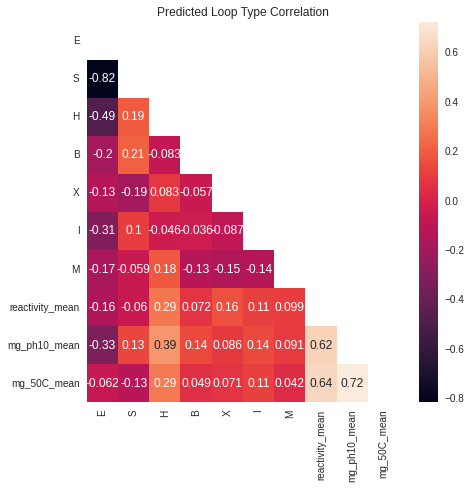

In [225]:
loops_corr = loops.corr()
matrix = np.triu(loops_corr)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(loops_corr, annot=True, mask=matrix)
plt.title('Predicted Loop Type Correlation')

### Data Pre_Processing

In [226]:
Data.drop(['reactivity_mean', 'mg_ph10_mean', 'mg_50C_mean', 'reactivity_error_mean', 'mg_ph10_error_mean', 'mg_50C_error_mean', 'seq_counts'], axis=1, inplace=True)

In [227]:
Data.drop(['SN_filter', 'signal_to_noise', 'deg_50C', 'deg_pH10', 'deg_error_pH10', 'deg_error_50C'], axis=1, inplace=True)

In [228]:
test.drop(['test_filter', 'seqpos', 'n_neighbors', 'first_cluster_member', 'cluster_id','S/N filter', 'ID'], axis=1, inplace=True)

In [229]:
test.rename(columns={'deg_50C_Mg_errors': 'deg_error_Mg_50C', 'deg_pH10_Mg_errors': 'deg_error_Mg_pH10', 'errors': 'reactivity_error'}, inplace=True)

In [230]:
col = set(test.columns.tolist()).intersection(set(Data.columns.tolist()))
print('The shape of Train: ', Data.shape)
print('The shape of Test: ', test.shape)
print('columns in test and train: {} with length {}'.format(col, len(col)))

The shape of Train:  (2400, 15)
The shape of Test:  (2493, 12)
columns in test and train: {'reactivity_error', 'seq_scored', 'deg_error_Mg_50C', 'deg_error_Mg_pH10', 'predicted_loop_type', 'sequence', 'structure', 'bpps_nb', 'seq_length', 'id', 'bpps_sum', 'bpps_max'} with length 12


In [231]:
train_data = []
for mol_id in Data['id'].unique():
    sample_data = Data.loc[Data['id'] == mol_id]
    for i in range(68):
        sample_tuple = (sample_data['id'].values[0], sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], sample_data['predicted_loop_type'].values[0][i],
                        sample_data['reactivity'].values[0][i], sample_data['reactivity_error'].values[0][i],
                        sample_data['deg_Mg_pH10'].values[0][i], sample_data['deg_error_Mg_pH10'].values[0][i],
                        sample_data['deg_Mg_50C'].values[0][i], sample_data['deg_error_Mg_50C'].values[0][i],
                        sample_data['bpps_sum'].values[0][i],
                        sample_data['bpps_max'].values[0][i],
                        sample_data['bpps_nb'].values[0][i])
        train_data.append(sample_tuple)

In [232]:
train = pd.DataFrame(train_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type', 'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
                                  'deg_Mg_50C', 'deg_error_Mg_50C', 'bpps_sum', 'bpps_max', 'bpps_nb'])
train.head()

,id,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_Mg_50C,deg_error_Mg_50C,bpps_sum,bpps_max,bpps_nb
0,id_001f94081,G,.,E,0.3297,0.1359,0.7556,0.2613,0.3581,0.1501,0.021786,0.198542,0.261682
1,id_001f94081,G,.,E,1.5693,0.2070,2.9830,0.3842,2.9683,0.2750,0.038653,0.183712,0.186916
2,id_001f94081,A,.,E,1.1227,0.1633,0.2526,0.1372,0.2589,0.0947,0.027590,0.060002,0.046729
3,id_001f94081,A,.,E,0.8686,0.1452,1.3789,0.2531,1.4552,0.1866,0.009471,0.013122,0.037383
4,id_001f94081,A,.,E,0.7217,0.1314,0.6376,0.1798,0.7244,0.1369,0.007029,0.011280,0.028037


In [233]:
train.shape

(163200, 13)

In [248]:
train.sequence.value_counts().index

Index(['A', 'G', 'C', 'U'], dtype='object')

In [ ]:
train.sequence.value_counts().index

In [246]:
train.sequence.unique().tolist()

['G', 'A', 'C', 'U']

Text(0, 0.5, 'count')

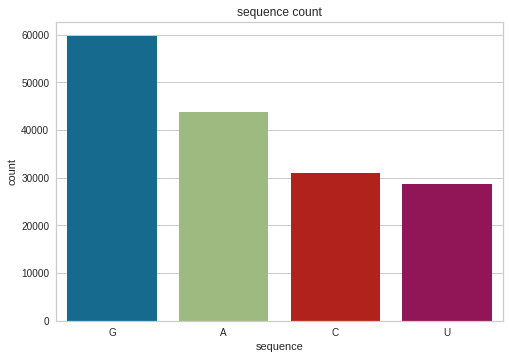

In [249]:
sns.barplot(data=train, x=train.sequence.unique().tolist(), y=train.sequence.value_counts().values)
plt.title('sequence count')
plt.xlabel('sequence')
plt.ylabel('count')

Text(0, 0.5, 'count')

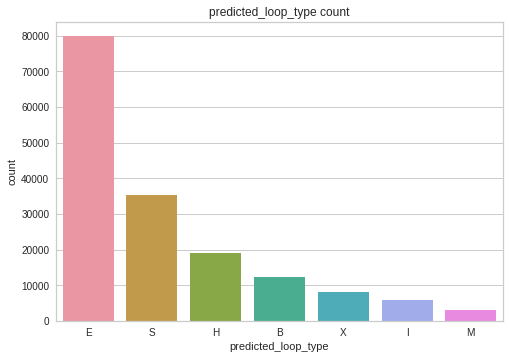

In [250]:
sns.barplot(data=train, x=train.predicted_loop_type.unique().tolist(), y=train.predicted_loop_type.value_counts().values)
plt.title('predicted_loop_type count')
plt.xlabel('predicted_loop_type')
plt.ylabel('count')

In [263]:
l = []
l.append(sum(train.structure.value_counts()[1:]))
l.append(train.structure.value_counts()[0])
s = ['(  )', '.']
l

[79933, 83267]

Text(0, 0.5, 'count')

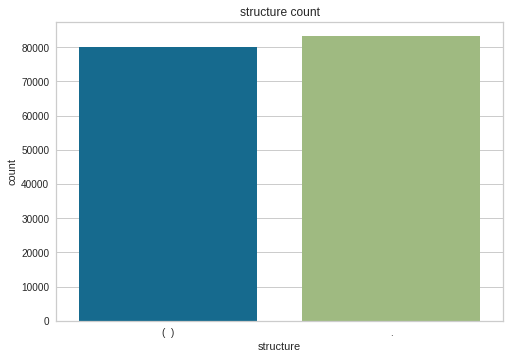

In [262]:
sns.barplot(data=train, x=s, y=l)
plt.title('structure count')
plt.xlabel('structure')
plt.ylabel('count')

In [170]:
test['deg_error_Mg_50C'] = test['deg_error_Mg_50C'].apply(lambda x: eval(x))
test['deg_error_Mg_pH10'] = test['deg_error_Mg_pH10'].apply(lambda x: eval(x))
test['reactivity_error'] = test['reactivity_error'].apply(lambda x: eval(x))
test['sequence'] = test['sequence'].apply(lambda x: list(x))
test['structure'] = test['structure'].apply(lambda x: list(x))
test['predicted_loop_type'] = test['predicted_loop_type'].apply(lambda x: list(x))

In [171]:
test_data = []
for mol_id in test['id'].unique():
    sample_data = test.loc[test['id'] == mol_id]
    for i in range(102):
        sample_tuple = (sample_data['id'].values[0],
                        sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i],
                        sample_data['predicted_loop_type'].values[0][i],
                        sample_data['deg_error_Mg_50C'].values[0][i],
                        sample_data['deg_error_Mg_pH10'].values[0][i],
                        sample_data['reactivity_error'].values[0][i],
                        sample_data['bpps_sum'].values[0][i],
                        sample_data['bpps_max'].values[0][i],
                        sample_data['bpps_nb'].values[0][i])
        test_data.append(sample_tuple)

In [172]:
test = pd.DataFrame(test_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type', 'deg_error_Mg_50C', 'deg_error_Mg_pH10', 'reactivity_error', 'bpps_sum', 'bpps_max', 'bpps_nb'])
test.head()

,id,sequence,structure,predicted_loop_type,deg_error_Mg_50C,deg_error_Mg_pH10,reactivity_error,bpps_sum,bpps_max,bpps_nb
0,id_40f52a81b,G,.,E,0.5922,0.4333,0.4419,0.099256,0.215586,0.138462
1,id_40f52a81b,G,.,E,0.5873,0.4910,0.4736,0.116411,0.232539,0.130769
2,id_40f52a81b,A,.,E,0.4347,0.4375,0.4529,0.113576,0.195696,0.023077
3,id_40f52a81b,A,.,E,0.4182,0.3079,0.3082,0.066063,0.067083,0.015385
4,id_40f52a81b,A,.,E,0.6207,0.5534,0.4485,0.000155,0.000155,0.007692


In [173]:
test.shape

(254286, 10)

In [174]:
train.duplicated().sum()

402

In [175]:
train.drop_duplicates(inplace=True)

In [176]:
print(train.reactivity_error.max(),' - ', train.reactivity_error.min())

146151.225  -  0.0019


In [177]:
train.describe()

,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_Mg_50C,deg_error_Mg_50C,bpps_sum,bpps_max,bpps_nb
count,162798.000000,162798.000000,162798.000000,162798.000000,162798.000000,162798.000000,162798.000000,162798.000000,162798.000000
mean,0.375848,2571.969031,0.447406,2125.075968,0.408035,3261.288823,0.395161,0.462121,0.087397
std,0.726308,18187.493484,0.704692,13936.782783,0.868848,22131.020706,0.408410,0.414934,0.095206
min,-20.664800,0.001900,-14.740500,0.006100,-24.252500,0.004100,0.000000,0.000000,0.000000
25%,0.044300,0.044800,0.132300,0.057100,0.075025,0.051900,0.012712,0.027205,0.018692
50%,0.216900,0.082800,0.290350,0.098600,0.257100,0.088700,0.192958,0.360303,0.056075
75%,0.541000,0.171800,0.568600,0.199600,0.561500,0.181200,0.888567,0.953759,0.130841
max,20.667500,146151.225000,14.740100,104235.174200,24.254900,171525.321700,0.999991,0.999991,0.757009


In [178]:
train.columns.tolist()

['id',
 'sequence',
 'structure',
 'predicted_loop_type',
 'reactivity',
 'reactivity_error',
 'deg_Mg_pH10',
 'deg_error_Mg_pH10',
 'deg_Mg_50C',
 'deg_error_Mg_50C',
 'bpps_sum',
 'bpps_max',
 'bpps_nb']

In [179]:
train.isnull().sum()

id                     0
sequence               0
structure              0
predicted_loop_type    0
reactivity             0
reactivity_error       0
deg_Mg_pH10            0
deg_error_Mg_pH10      0
deg_Mg_50C             0
deg_error_Mg_50C       0
bpps_sum               0
bpps_max               0
bpps_nb                0
dtype: int64

### Encoding

In [180]:
encoded_train = train.copy()
encoded_test = test.copy()
# encoded_train = pd.get_dummies(train, columns=['sequence'])
# encoded_test = pd.get_dummies(test, columns=['sequence'])

In [181]:
encoder_pl= ce.OrdinalEncoder(cols=['predicted_loop_type'],return_df=True,
                        mapping=[{'col':'predicted_loop_type',
                                  'mapping':{'M':0, 'B':1, 'X':2, 'S':3, 'I':4, 'E':5, 'H':6}}])
encoded_train['predicted_loop_type'] = encoder_pl.fit_transform(encoded_train['predicted_loop_type'])

encoder_pl= ce.OrdinalEncoder(cols=['predicted_loop_type'],return_df=True,
                        mapping=[{'col':'predicted_loop_type',
                                  'mapping':{'M':0, 'B':1, 'X':2, 'S':3, 'I':4, 'E':5, 'H':6}}])
encoded_test['predicted_loop_type'] = encoder_pl.fit_transform(encoded_test['predicted_loop_type'])

# encoded_train.drop('predicted_loop_type', axis=1, inplace=True)
# 'M':0, 'B':1, 'X':2, 'S':3, 'I':4, 'E':5, 'H':6

In [182]:
encoder= ce.OrdinalEncoder(cols=['structure'],return_df=True,
                        mapping=[{'col':'structure',
                                  'mapping':{'.':-1, ')':1, '(':0}}])
encoded_train['structure'] = encoder.fit_transform(encoded_train['structure'])

encoder= ce.OrdinalEncoder(cols=['structure'],return_df=True,
                        mapping=[{'col':'structure',
                                  'mapping':{'.':-1, ')':1, '(':0}}])
encoded_test['structure'] = encoder.fit_transform(encoded_test['structure'])
# encoded_train.drop('structure', axis=1, inplace=True)

In [183]:
encoder= ce.OrdinalEncoder(cols=['sequence'],return_df=True,
                        mapping=[{'col':'sequence',
                                  'mapping':{'C':0, 'U':1, 'G':2, 'A':3}}])
encoded_train['sequence'] = encoder.fit_transform(encoded_train['sequence'])

encoder= ce.OrdinalEncoder(cols=['sequence'],return_df=True,
                        mapping=[{'col':'sequence',
                                  'mapping':{'C':0, 'U':1, 'G':2, 'A':3}}])
encoded_test['sequence'] = encoder.fit_transform(encoded_test['sequence'])
# 'C':0, 'U':1, 'G':2, 'A':3

In [184]:
train = encoded_train.drop('id', axis=1)
ID = encoded_test['id']
test = encoded_test.drop('id', axis=1)

<AxesSubplot:>

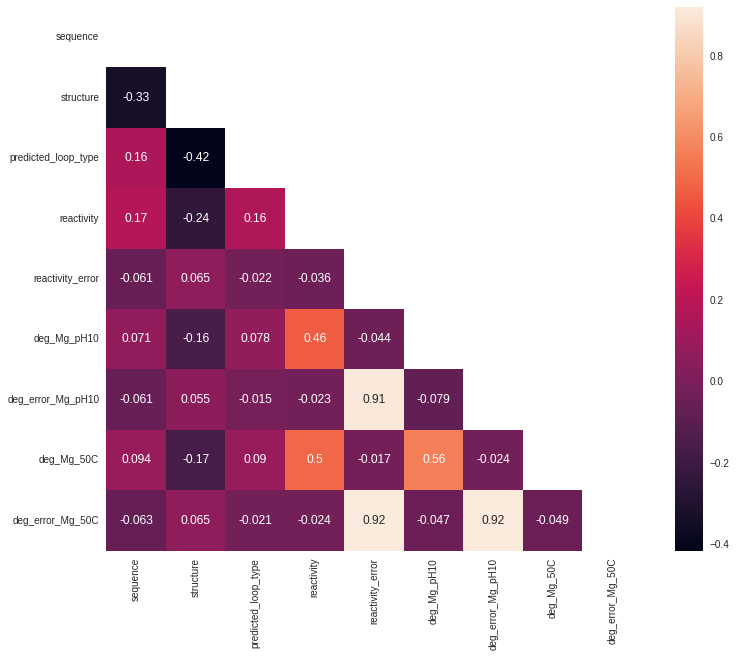

In [185]:
train.drop(['bpps_nb', 'bpps_max', 'bpps_sum'], axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, mask=np.triu(train.corr()))

In [60]:
# # , 'bpps_max', 'bpps_sum'
# train.drop(['reactivity_error', 'deg_error_Mg_pH10', 'deg_error_Mg_50C', 'bpps_nb', 'bpps_max', 'bpps_sum'], axis=1, inplace=True)
# test.drop(['reactivity_error', 'deg_error_Mg_pH10', 'deg_error_Mg_50C', 'bpps_nb', 'bpps_max', 'bpps_sum'], axis=1, inplace=True)

In [61]:
train.shape

(162798, 12)

In [62]:
test.shape

(254286, 9)

### OutLiers

In [63]:
# numerical_features = [ 'reactivity',
#  'reactivity_error',
#  'deg_Mg_pH10',
#  'deg_error_Mg_pH10',
#  'deg_Mg_50C',
#  'deg_error_Mg_50C']
# def detect_outLier_features(df):
#     for feature in numerical_features:
#         q1 = np.quantile(df[feature], 0.25, interpolation='midpoint')
#         q3 = np.quantile(df[feature], 0.75, interpolation='midpoint')
#         IQR = q3 - q1
#         upper_outlier = q3 + (1.5 * IQR)
#         lower_outlier = q1 - (1.5 * IQR)
#         print(str(feature)+' IQR :', IQR)
#         print(str(feature)+' Upper Outlier :', upper_outlier)
#         print(str(feature)+' Lower Outlier :', lower_outlier)
#         print('==============================================')
# detect_outLier_features(train)

In [64]:
# out_val = train[(train.reactivity_error>0.33375000000000005) & (train.deg_error_Mg_pH10>0.38005) & (train.deg_error_Mg_50C>0.3427)]
# s_out_val = out_val.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1).values

In [65]:
# re_out_val = out_val.reactivity.values

In [66]:
# out_val = np.array([1, -1, 5, 2.8272, 73705.3985, 16.6174]).reshape(1,-1)
# out_val
# # 0.0000

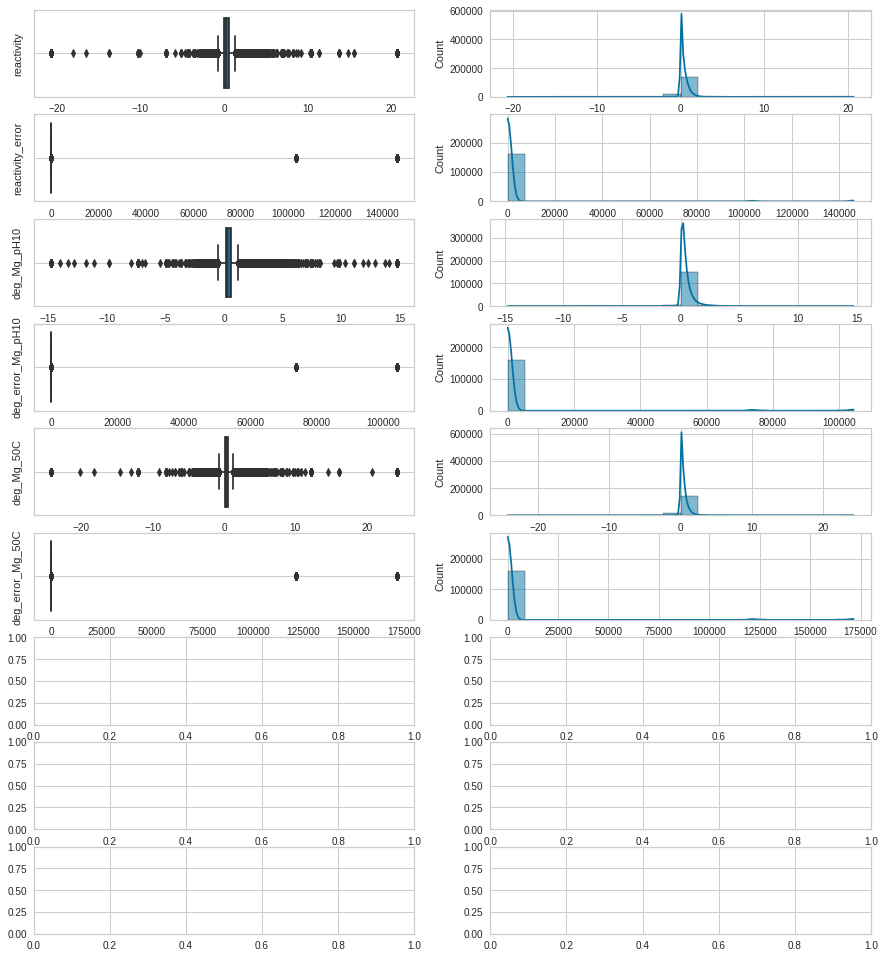

In [186]:
cols = [ 'reactivity', 'reactivity_error',
 'deg_Mg_pH10', 'deg_error_Mg_pH10',
 'deg_Mg_50C', 'deg_error_Mg_50C']
fig, ax = plt.subplots(9,2, figsize=(15,17))
for count1, value in enumerate(cols):
    # visulaize box plot
    sns.boxplot(data=train, x=train[value], ax=ax[count1, 0])
    ax[count1, 0].set_ylabel(str(value))
    ax[count1, 0].grid()
    # visulaize histogram plot
    bins = len(train[value].unique())//2
    sns.histplot(data=train, x=train[value], bins=20, kde=True, ax=ax[count1, 1])

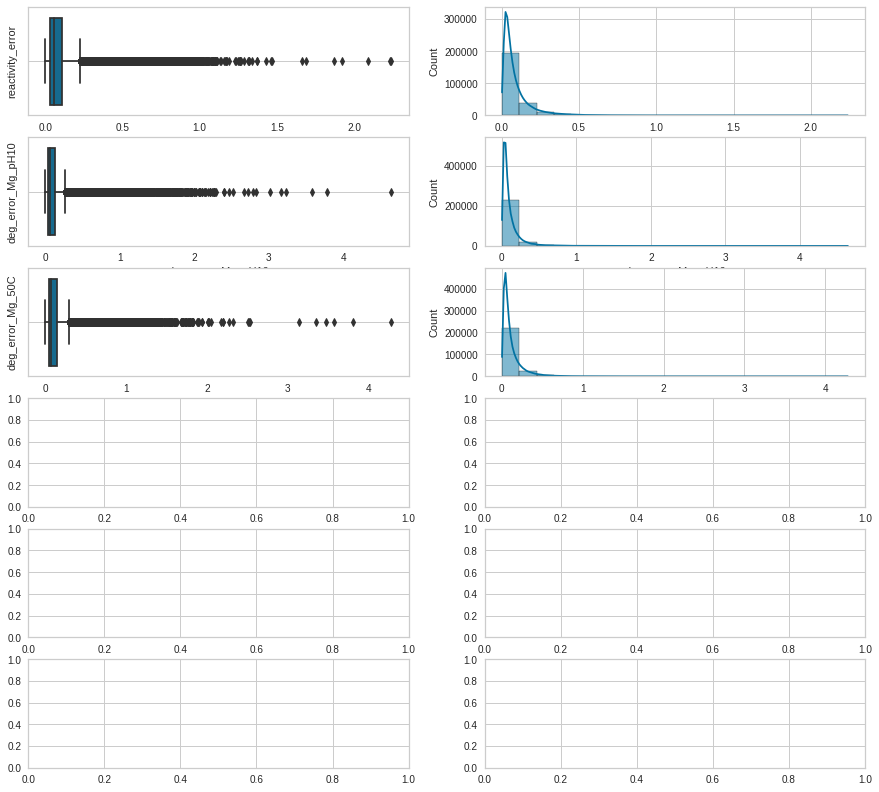

In [187]:
test_cols = ['reactivity_error', 'deg_error_Mg_pH10', 'deg_error_Mg_50C']
fig, ax = plt.subplots(6,2, figsize=(15,14))
for count1, value in enumerate(test_cols):
    # visulaize box plot
    sns.boxplot(data=test, x=test[value], ax=ax[count1, 0])
    ax[count1, 0].set_ylabel(str(value))
    ax[count1, 0].grid()
    # visulaize histogram plot
    bins = len(test[value].unique())//2
    sns.histplot(data=test, x=test[value], bins=20, kde=True, ax=ax[count1, 1])

In [188]:
Q1 = train[cols].quantile(0.25)
Q3 = train[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((train[cols] < (Q1 - 1.5 * IQR)) | (train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
train = train[condition]
print('Train shape {}'.format(train.shape))
print('Test shape {}'.format(test.shape))

Train shape (125459, 9)
Test shape (254286, 9)


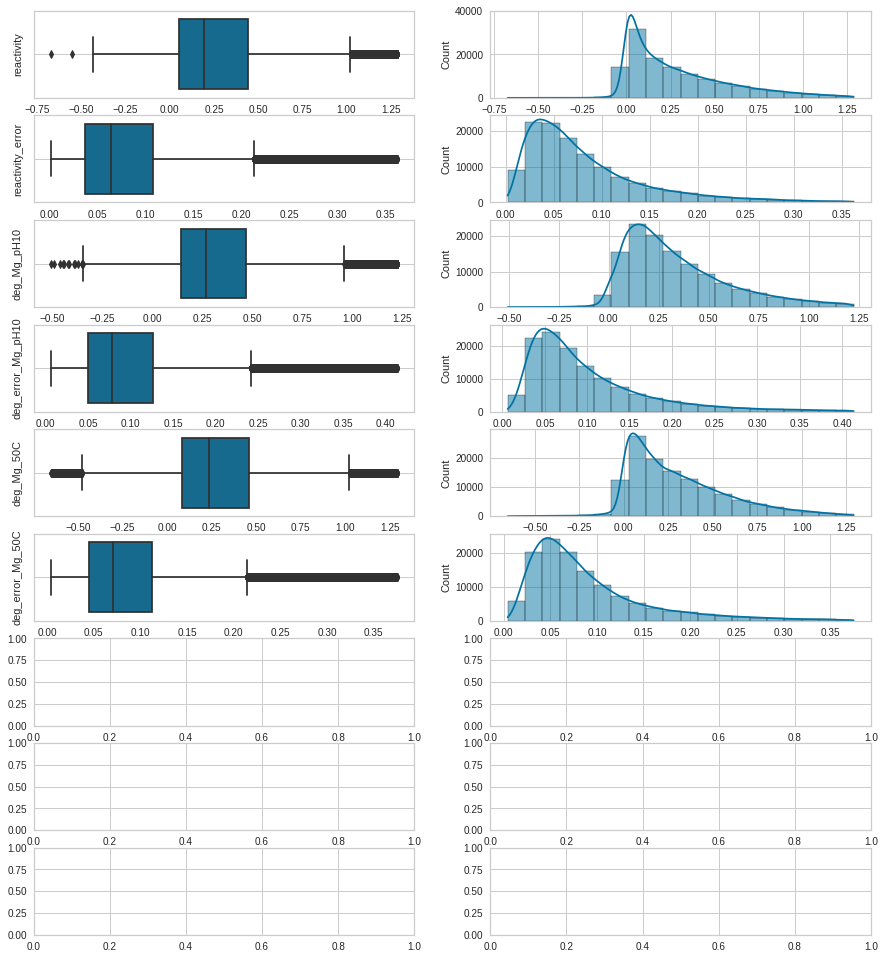

In [189]:
fig, ax = plt.subplots(9,2, figsize=(15,17))
for count1, value in enumerate(cols):
    # visulaize box plot
    sns.boxplot(data=train, x=train[value], ax=ax[count1, 0])
    ax[count1, 0].set_ylabel(str(value))
    ax[count1, 0].grid()
    # visulaize histogram plot
    bins = len(train[value].unique())//2
    sns.histplot(data=train, x=train[value], bins=20, kde=True, ax=ax[count1, 1])

In [71]:
# fig, ax = plt.subplots(figsize=(12, 10))
# sns.heatmap(train.corr(), annot=True, mask=np.triu(train.corr()))

In [72]:
train.drop('bpps_nb', axis=1, inplace=True)
test.drop('bpps_nb', axis=1, inplace=True)

In [73]:
reactivity = train['reactivity'].values
ph10 = train['deg_Mg_pH10'].values
c50 = train['deg_Mg_50C'].values

### Modeling

In [74]:
# def feature_importance(model, Data):
#     fig, ax = plt.subplots(figsize=(8,6))
#     sort = model.feature_importances_.argsort()
#     plt.barh(Data.columns[sort], model.feature_importances_[sort])
#     plt.title(str(col))
#     plt.xlabel("Feature Importance")

In [75]:
Target = train[['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']]
Data = train.drop(['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(Data, Target, test_size = 0.2, random_state=42)

In [76]:
def MCRMSE(y_true, y_pred):
    colwise_mse = np.mean(np.square(y_true - y_pred), axis=1)
    return np.mean(np.sqrt(colwise_mse))

In [77]:
model = MultiOutputRegressor(XGBRegressor(random_state=7), n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
MCRMSE(y_val, pred)

0.28251258912556176

In [78]:
temp = pd.DataFrame(pred, columns=['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'])
print(temp.shape)
print(y_val.shape)

(32560, 3)
(32560, 3)


Text(0, 0.5, 'Predicted Values')

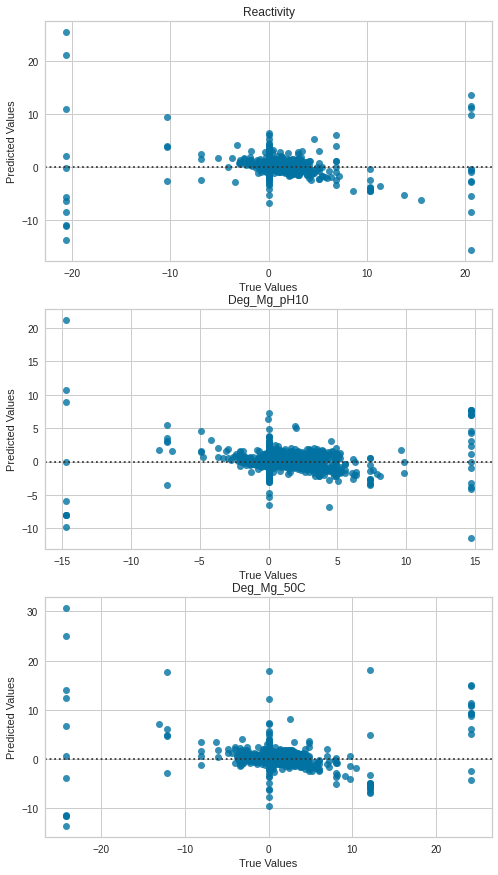

In [79]:
fig, ax = plt.subplots(3, figsize=(8,15))
sns.residplot(x=y_val.reactivity, y=temp.reactivity, ax=ax[0])
ax[0].set_title('Reactivity')
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
sns.residplot(x=y_val.deg_Mg_pH10, y=temp.deg_Mg_pH10, ax=ax[1])
ax[1].set_title('Deg_Mg_pH10')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
sns.residplot(x=y_val.deg_Mg_50C, y=temp.deg_Mg_50C, ax=ax[2])
ax[2].set_title('Deg_Mg_50C')
ax[2].set_xlabel('True Values')
ax[2].set_ylabel('Predicted Values')

In [80]:
# print('The number of estimators: ', len(model.estimators_))
# print('XGboost feature importances')
# fig, ax = plt.subplots(3, figsize=(10,12))
# for ind, col in enumerate(y_val.columns):
#     sort = model.estimators_[ind].feature_importances_.argsort()
#     ax[ind].barh(Data.columns[sort], model.estimators_[ind].feature_importances_[sort])
#     ax[ind].set_title(str(col))
# ax[2].set_xlabel("Feature Importance")

In [81]:
lgbm = MultiOutputRegressor(LGBMRegressor(random_state=11), n_jobs=-1)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_val)
MCRMSE(y_val, pred)

0.2976514749273737

In [82]:
temp = pd.DataFrame(pred, columns=['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'])
print(temp.shape)
print(y_val.shape)

(32560, 3)
(32560, 3)


Text(0, 0.5, 'Predicted Values')

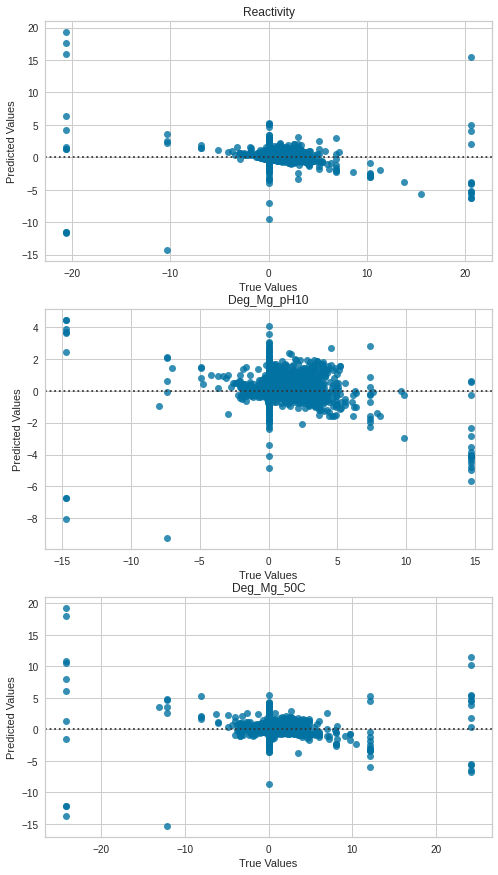

In [83]:
fig, ax = plt.subplots(3, figsize=(8,15))
sns.residplot(x=y_val.reactivity, y=temp.reactivity, ax=ax[0])
ax[0].set_title('Reactivity')
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
sns.residplot(x=y_val.deg_Mg_pH10, y=temp.deg_Mg_pH10, ax=ax[1])
ax[1].set_title('Deg_Mg_pH10')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
sns.residplot(x=y_val.deg_Mg_50C, y=temp.deg_Mg_50C, ax=ax[2])
ax[2].set_title('Deg_Mg_50C')
ax[2].set_xlabel('True Values')
ax[2].set_ylabel('Predicted Values')

In [84]:
# print('The number of estimators: ', len(lgbm.estimators_))
# print('LGBM feature importances')
# fig, ax = plt.subplots(3, figsize=(10,12))
# for ind, col in enumerate(y_val.columns):
#     sort = lgbm.estimators_[ind].feature_importances_.argsort()
#     ax[ind].barh(Data.columns[sort], lgbm.estimators_[ind].feature_importances_[sort])
#     ax[ind].set_title(str(col))
# ax[2].set_xlabel("Feature Importance")

### Tuning Model

In [85]:
# param_grid = {'estimator__eval_metric'      : ['rmse'],
#               'estimator__n_estimators'     : [100],
#               'estimator__learning_rate'    : [0.05, 0.03, 0.5, 0.10, 0.15, 0.2] ,
#               'estimator__max_depth'        : [3, 5, 6, 7, 8, 9, 11],
#               'estimator__min_child_weight' : [ 5, 7, 9, 11, 13, 15],
#               'estimator__subsample'        : [i/10.0 for i in range(6,10)],
#               'estimator__gamma'            : [ 0.0, 0.1, 0.2],
#               'estimator__colsample_bytree' : [i/10.0 for i in range(6,10)],
#               'estimator__reg_alpha'        : [1e-5, 1e-2, 0.1, 1, 100]}
# fold = KFold(n_splits=3, shuffle=True, random_state=42).split(X_train, y_train)
# xgb = MultiOutputRegressor(XGBRegressor(random_state=7), n_jobs=-1)
# xgb_grid_search = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, n_iter = 30, cv =fold , random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# xgb_grid_search.fit(X_train, y_train)
# print('Best_Estimator: ', xgb_grid_search.best_estimator_)
# print('Best_Score: ', xgb_grid_search.best_score_)

In [86]:
# model = xgb_grid_search.best_estimator_
# pred = model.predict(X_val)
# MCRMSE(y_val, pred)

In [87]:
# param_grid = { 
#                 'estimator__metric': 'rmse',
#                 'estimator__n_estimators': [1000],
#                 'estimator__boosting_type': ["gbdt", "goss"],
#                 'estimator__reg_alpha': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
#                 'estimator__reg_lambda': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
#                 'estimator__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#                 'estimator__subsample': [0.6, 0.7, 0.85, 1.0],
#                 'estimator__learning_rate': [0.01, 0.05, 0.1, 0.2],
#                 'estimator__max_depth': list(range(2, 12, 1)),
#                 'estimator__num_leaves' : list(range(13, 148, 5)),
#                 'estimator__min_child_samples': list(range(1, 96, 5)),
#             }
# lgbm =MultiOutputRegressor(LGBMRegressor(random_state=11), n_jobs=-1)
# fold = KFold(n_splits=3, shuffle=True, random_state=42).split(X_train, y_train)
# lgbm_grid_search = RandomizedSearchCV(estimator = lgbm, param_distributions = param_grid, n_iter = 30, cv =fold , random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# lgbm_grid_search.fit(X_train, y_train)
# print('Best_Estimator: ', lgbm_grid_search.best_estimator_)
# print('Best_Score: ', lgbm_grid_search.best_score_)

In [88]:
# model3 = lgbm_grid_search.best_estimator_
# pred = model3.predict(X_val)
# MCRMSE(y_val, pred)

In [89]:
# fig, ax = plt.subplots(3, figsize=(8,15))
# sns.residplot(x=y_val.reactivity, y=temp.reactivity, ax=ax[0])
# ax[0].set_title('Reactivity')
# ax[0].set_xlabel('True Values')
# ax[0].set_ylabel('Predicted Values')
# sns.residplot(x=y_val.deg_Mg_pH10, y=temp.deg_Mg_pH10, ax=ax[1])
# ax[1].set_title('Deg_Mg_pH10')
# ax[1].set_xlabel('True Values')
# ax[1].set_ylabel('Predicted Values')
# sns.residplot(x=y_val.deg_Mg_50C, y=temp.deg_Mg_50C, ax=ax[2])
# ax[2].set_title('Deg_Mg_50C')
# ax[2].set_xlabel('True Values')
# ax[2].set_ylabel('Predicted Values')

### Reactivity

In [90]:
# X_train, X_val, y_train, y_val = train_test_split(Data, reactivity, test_size = 0.25, random_state=42)

In [91]:
# numerical_features = ['reactivity_error', 'deg_error_Mg_pH10', 'deg_error_Mg_50C', 'bpps_sum', 'bpps_max', 'bpps_nb' ]
# def detect_outLier_features(df):
#     for feature in numerical_features:
#         q1 = np.quantile(df[feature], 0.25, interpolation='midpoint')
#         q3 = np.quantile(df[feature], 0.75, interpolation='midpoint')
#         IQR = q3 - q1
#         upper_outlier = q3 + (1.5 * IQR)
#         lower_outlier = q1 - (1.5 * IQR)
#         print(str(feature)+' IQR :', IQR)
#         print(str(feature)+' Upper Outlier :', upper_outlier)
#         print(str(feature)+' Lower Outlier :', lower_outlier)
#         print('==============================================')
# detect_outLier_features(train)

In [92]:
# cols = ['reactivity', 'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_Mg_50C', 'bpps_sum', 'bpps_max', 'bpps_nb' ]
# ss = pd.DataFrame(X_train, columns=['sequence', 'structure', 'predicted_loop_type', 'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_Mg_50C', 'bpps_sum', 'bpps_max', 'bpps_nb']).reset_index().drop('index', axis=1)
# s = pd.DataFrame(y_train, columns=['reactivity']).reset_index().drop('index', axis=1)

# temp_df = pd.concat([ss, s], axis=1, ignore_index=False)
# print(temp_df.shape)
# Q1 = temp_df[cols].quantile(0.25)
# Q3 = temp_df[cols].quantile(0.75)
# IQR = Q3 - Q1
# condition = ~((temp_df[cols] < (Q1 - 2.5 * IQR)) | (temp_df[cols] > (Q3 + 2.5 * IQR))).any(axis=1)
# temp_df = temp_df[condition]
# print(temp_df.shape)

In [93]:
# X_train = temp_df.drop('reactivity', axis=1).values
# y_train = temp_df['reactivity'].values

In [94]:
# X_val.shape

#### LGBM

In [95]:
# lgbm = LGBMRegressor(random_state=11)
# lgbm.fit(X_train, y_train)
# pred = lgbm.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [96]:
# visualizer = PredictionError(lgbm)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(lgbm)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

In [97]:
# feature_importance(lgbm, Data)

#### XGboost

In [98]:
# xgb = XGBRegressor(random_state=7)
# xgb.fit(X_train, y_train)
# pred = xgb.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [99]:
# visualizer = PredictionError(xgb)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(xgb)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

In [100]:
# feature_importance(xgb, Data)

#### Random Forest

In [101]:
# ran = RandomForestRegressor(random_state=11)
# ran.fit(X_train, y_train)
# pred = ran.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [102]:
# visualizer = PredictionError(ran)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(ran)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

In [103]:
# res = ran.predict(s_out_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(re_out_val, res))))

#### CatBoost

In [104]:
# cat = CatBoostRegressor(random_state=11)
# cat.fit(X_train, y_train)
# pred = cat.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [105]:
# visualizer = PredictionError(cat)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(cat)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

### deg_mg_ph10

In [106]:
# X_train, X_val, y_train, y_val = train_test_split(Data, ph10, test_size = 0.25, random_state=42)

#### LGBM

In [107]:
# lgbm = LGBMRegressor(random_state=11)
# lgbm.fit(X_train, y_train)
# pred = lgbm.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [108]:
# visualizer = PredictionError(lgbm)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(lgbm)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

#### XGboost

In [109]:
# xgb = XGBRegressor(random_state=7)
# xgb.fit(X_train, y_train)
# pred = xgb.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [110]:
# visualizer = PredictionError(xgb)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(xgb)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

#### Random Forest

In [111]:
# ran = RandomForestRegressor(random_state=11)
# ran.fit(X_train, y_train)
# pred = ran.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [112]:
# visualizer = PredictionError(ran)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(ran)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

#### CatBoost

In [113]:
# cat = CatBoostRegressor(random_state=11)
# cat.fit(X_train, y_train)
# pred = cat.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [114]:
# visualizer = PredictionError(cat)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(cat)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

### deg_mg_50c

In [115]:
# X_train, X_val, y_train, y_val = train_test_split(Data, c50, test_size = 0.25, random_state=42)

#### LGBM

In [116]:
# lgbm = LGBMRegressor(random_state=11)
# lgbm.fit(X_train, y_train)
# pred = lgbm.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [117]:
# visualizer = PredictionError(lgbm)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(lgbm)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

#### XGboost

In [118]:
# xgb = XGBRegressor(random_state=7)
# xgb.fit(X_train, y_train)
# pred = xgb.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [119]:
# visualizer = PredictionError(xgb)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(xgb)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

#### Random Forest

In [120]:
# ran = RandomForestRegressor(random_state=11)
# ran.fit(X_train, y_train)
# pred = ran.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [121]:
# visualizer = PredictionError(ran)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(ran)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

#### CatBoost

In [122]:
# cat = CatBoostRegressor(random_state=11)
# cat.fit(X_train, y_train)
# pred = cat.predict(X_val)
# print('The RMSE {}'.format(np.sqrt(mean_squared_error(y_val, pred))))

In [123]:
# visualizer = PredictionError(cat)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(cat)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

### predict test values

In [126]:
test_pre = lgbm.predict(test)
print(test_pre[:,0])


[0.93915004 0.89427108 0.66494985 ... 0.97799804 0.95138751 0.91268853]


### Sub_CSV

In [125]:
# sub['reactivity'] = test_pre[:,0]
# sub['deg_Mg_pH10'] = test_pre[:,1]
# sub['deg_Mg_50C'] = test_pre[:,2]
# sub.to_csv('sub6.csv', index = False)